In [14]:
import pandas as pd
df_wine = pd.read_csv('Wine.csv') #https://archive.ics.uci.edu/ml/machine-learning-databases/wine/
df_wine

,AlcoholAsh,Malic_Acid,Unnamed: 2,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
x,y = df_wine.iloc[:,0:-1].values,df_wine.iloc[:,-1].values

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.3,
                                                 random_state=0,
                                                 stratify=y)

std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

lr = LogisticRegression(penalty='l1',solver='liblinear',multi_class='ovr')
lr.fit(x_train_std,y_train)
print('traing accuracy:',lr.score(x_train_std,y_train))
print('traing accuracy:',lr.score(x_test_std,y_test))



traing accuracy: 1.0
traing accuracy: 1.0


 1. Proline                        0.172807
 2. Color_Intensity                0.167657
 3. Flavanoids                     0.162766
 4. OD280                          0.138054
 5. AlcoholAsh                     0.114116
 6. Hue                            0.061084
 7. Total_Phenols                  0.051240
 8. Magnesium                      0.033747
 9. Malic_Acid                     0.026961
10. Proanthocyanins                0.025304
11. Ash_Alcanity                   0.020055
12. Nonflavanoid_Phenols           0.014246
13. Unnamed: 2                     0.011962


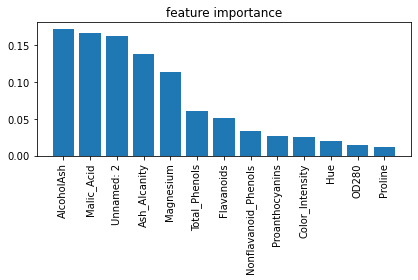

In [61]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
wine_labels = df_wine.columns[0:-1]
forest = RandomForestClassifier(n_estimators=500,
                               random_state=0)
forest.fit(x_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print('%2d. %-*s %f' % (f+1,30,
                           wine_labels[indices[f]],
                           importances[indices[f]]))
plt.title('feature importance')
plt.bar(range(x_train.shape[1]),
       importances[indices],
       align = 'center')

plt.xticks(range(x_train.shape[1]),
          wine_labels,rotation = 90)
plt.xlim([-1,x_train.shape[1]])
plt.tight_layout()
plt.show()